## <div align="center"> IF540 MACHINE LEARNING </div>
### <div align="center"> UAS : Neural Network </div>
### <div align="center"> Prediksi Tingkat Kasus Covid-19 Berdasarkan Tren Mobilitas Masyarakat <br/> di Asia Tenggara dengan menggunakan Algoritma Neural Network </div>

#### <div align="center"> Semester Ganjil 2022/2023 </div>

In [6]:
import datetime
import uuid    

# Fill in your name and NIM
name1 = "Antonius Kevin Budi Saputra"
nim1 = "45444"
name2 = "Chrealvin"
nim2 = "45606"
name3 = "Ela Setiorini"
nim3 = "48258"
name4 = "Muhammad Farrel Prasetyo"
nim4 = "51515"

myDate = datetime.datetime.now()
myDevice = str(uuid.uuid1())

# Header
print("Kelompok J")
print("Name 1 \t\t: {}".format(name1))
print("NIM 1 \t\t: {}".format(nim1))
print("Name 2 \t\t: {}".format(name2))
print("NIM 2 \t\t: {}".format(nim2))
print("Name 3 \t\t: {}".format(name3))
print("NIM 3 \t\t: {}".format(nim3))
print("Name 4 \t\t: {}".format(name4))
print("NIM 4 \t\t: {}".format(nim4))
print("Start \t\t: {}".format(myDate))
print("Device ID \t: {}".format(myDevice))

Kelompok J
Name 1 		: Antonius Kevin Budi Saputra
NIM 1 		: 45444
Name 2 		: Chrealvin
NIM 2 		: 45606
Name 3 		: Ela Setiorini
NIM 3 		: 48258
Name 4 		: Muhammad Farrel Prasetyo
NIM 4 		: 51515
Start 		: 2022-12-07 21:56:09.272669
Device ID 	: 48ade69c-763f-11ed-9973-068db3350b0b



---

### Dataset yang dipakai:

1. [COVID-19 Stats and Mobility Trends] – sumber : [https://www.kaggle.com/datasets/diogoalex/covid19-stats-and-trends]

### Hasil kerja

---

#### Import Library

In [1]:
import sys
import tensorflow.keras as tk
import pandas as pd
import sklearn as sk
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

### Read Data

In [92]:
covid = pd.read_csv("COVID-19.csv", index_col='date', parse_dates=['date'])

In [220]:
covid.head()

,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,residential_percent_change_from_baseline,retail_and_recreation_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,confirmed_cases
date,,,,,,,
2020-02-15,4.0,5.0,1.0,0.0,0.0,2.0,8
2020-02-16,4.0,4.0,1.0,1.0,1.0,2.0,9
2020-02-17,1.0,5.0,1.0,-1.0,1.0,2.0,9
2020-02-18,1.0,5.0,1.0,-2.0,0.0,2.0,9
2020-02-19,0.0,4.0,1.0,-2.0,-1.0,2.0,9


In [94]:
np.unique(covid['country'])

array(['Afghanistan', 'Angola', 'Antigua and Barbuda', 'Argentina',
       'Aruba', 'Australia', 'Austria', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria',
       'Burkina Faso', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Czechia',
       "Côte d'Ivoire", 'Denmark', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala',
       'Guinea-Bissau', 'Haiti', 'Honduras', 'Hong Kong', 'Hungary',
       'India', 'Indonesia', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kuwait',
       'Kyrgyzstan', 'Laos', 'Latvia', 'Lebanon', 'Libya',
       'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malaysia', 'Mali',
       'Malta', 'Mauritius', 'Mexico', 'Moldova',

### Take SouthEast Asia Data

In [6]:
covid_ind = covid[covid['country']=='Indonesia']
covid_mly = covid[covid['country']=='Malaysia']
covid_sg = covid[covid['country']=='Singapore']
covid_th = covid[covid['country']=='Thailand']
covid_vt = covid[covid['country']=='Vietnam']
covid_laos = covid[covid['country']=='Laos']
covid_ph = covid[covid['country']=='Philipines']
covid_cam = covid[covid['country']=='Cambodia']

In [7]:
data = pd.concat([covid_ind, covid_mly, covid_sg, covid_th, covid_vt, covid_laos, covid_ph, covid_cam])

In [8]:
np.unique(data['country'])

array(['Cambodia', 'Indonesia', 'Laos', 'Malaysia', 'Singapore',
       'Thailand', 'Vietnam'], dtype=object)

In [9]:
covid = data

### Check Correlation between Data

In [95]:
covid.corr()

,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,residential_percent_change_from_baseline,retail_and_recreation_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,confirmed_cases,confirmed_deaths,gov_response_stringency_index,total_tests,total_vaccinations,people_vaccinated,people_fully_vaccinated,gdp_ppp_per_capita,population,population_density,human_development_index,pop_age_above_65_percentage,health_index
grocery_and_pharmacy_percent_change_from_baseline,1.000000,0.410305,-0.641868,0.788686,0.731100,0.605142,0.032780,0.026222,-0.420921,0.025696,0.024201,0.036085,0.037147,-0.027623,0.024093,0.030031,-0.117287,-0.050682,-0.104515
parks_percent_change_from_baseline,0.410305,1.000000,-0.471642,0.516251,0.410472,0.197375,-0.042821,-0.031956,-0.303640,-0.011589,0.046682,0.041887,0.031770,0.184860,-0.074064,-0.062753,0.201056,0.339687,0.132992
residential_percent_change_from_baseline,-0.641868,-0.471642,1.000000,-0.770550,-0.747110,-0.748314,0.013658,0.024674,0.619642,-0.035086,-0.005497,0.013363,-0.059719,0.093482,0.046800,0.104371,0.092110,-0.045429,0.112505
retail_and_recreation_percent_change_from_baseline,0.788686,0.516251,-0.770550,1.000000,0.829413,0.700838,-0.041157,-0.057367,-0.646824,0.034294,0.096643,0.090655,0.221332,-0.116150,-0.058861,-0.018584,-0.232884,-0.125499,-0.238970
transit_stations_percent_change_from_baseline,0.731100,0.410472,-0.747110,0.829413,1.000000,0.708633,-0.012715,-0.034726,-0.604809,-0.014244,0.044184,0.039109,0.104290,-0.155482,0.024649,-0.009297,-0.257160,-0.140656,-0.268542
workplaces_percent_change_from_baseline,0.605142,0.197375,-0.748314,0.700838,0.708633,1.000000,-0.017857,-0.031230,-0.536681,-0.017662,0.014748,0.007149,0.029808,-0.138436,-0.003261,0.000298,-0.225709,-0.164193,-0.219318
confirmed_cases,0.032780,-0.042821,0.013658,-0.041157,-0.012715,-0.017857,1.000000,0.939144,0.090894,0.967014,0.797584,0.815639,0.783652,0.078513,0.433253,-0.028950,0.102316,0.078580,0.074325
confirmed_deaths,0.026222,-0.031956,0.024674,-0.057367,-0.034726,-0.031230,0.939144,1.000000,0.111263,0.944412,0.752527,0.774977,0.732166,0.090035,0.386039,-0.043245,0.136056,0.112915,0.108688
gov_response_stringency_index,-0.420921,-0.303640,0.619642,-0.646824,-0.604809,-0.536681,0.090894,0.111263,1.000000,0.049506,0.045560,0.075800,-0.010309,0.047121,0.074079,-0.004693,0.111771,-0.022173,0.106921
total_tests,0.025696,-0.011589,-0.035086,0.034294,-0.014244,-0.017662,0.967014,0.944412,0.049506,1.000000,0.849749,0.869753,0.812567,0.164300,0.570107,-0.050605,0.158590,0.082025,0.085765


In [96]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 53377 entries, 2020-02-15 to 2021-03-23
Data columns (total 21 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   iso                                                 52974 non-null  object 
 1   country                                             53377 non-null  object 
 2   grocery_and_pharmacy_percent_change_from_baseline   52362 non-null  float64
 3   parks_percent_change_from_baseline                  52177 non-null  float64
 4   residential_percent_change_from_baseline            52072 non-null  float64
 5   retail_and_recreation_percent_change_from_baseline  52405 non-null  float64
 6   transit_stations_percent_change_from_baseline       52534 non-null  float64
 7   workplaces_percent_change_from_baseline             53222 non-null  float64
 8   confirmed_cases                                     53377 n

In [97]:
covid.columns

Index(['iso', 'country', 'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'residential_percent_change_from_baseline',
       'retail_and_recreation_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline', 'confirmed_cases',
       'confirmed_deaths', 'gov_response_stringency_index', 'total_tests',
       'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated',
       'gdp_ppp_per_capita', 'population', 'population_density',
       'human_development_index', 'pop_age_above_65_percentage',
       'health_index'],
      dtype='object')

### Drop unused Data

In [98]:
covid.drop(columns=['iso', 'country', 
       'confirmed_deaths', 'gov_response_stringency_index', 'total_tests',
       'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated',
       'gdp_ppp_per_capita', 'population', 'population_density',
       'human_development_index', 'pop_age_above_65_percentage',
       'health_index'], inplace=True)

In [99]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 53377 entries, 2020-02-15 to 2021-03-23
Data columns (total 7 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   grocery_and_pharmacy_percent_change_from_baseline   52362 non-null  float64
 1   parks_percent_change_from_baseline                  52177 non-null  float64
 2   residential_percent_change_from_baseline            52072 non-null  float64
 3   retail_and_recreation_percent_change_from_baseline  52405 non-null  float64
 4   transit_stations_percent_change_from_baseline       52534 non-null  float64
 5   workplaces_percent_change_from_baseline             53222 non-null  float64
 6   confirmed_cases                                     53377 non-null  int64  
dtypes: float64(6), int64(1)
memory usage: 3.3 MB


In [100]:
covid.isna().sum()

grocery_and_pharmacy_percent_change_from_baseline     1015
parks_percent_change_from_baseline                    1200
residential_percent_change_from_baseline              1305
retail_and_recreation_percent_change_from_baseline     972
transit_stations_percent_change_from_baseline          843
workplaces_percent_change_from_baseline                155
confirmed_cases                                          0
dtype: int64

### Drop NaN data from Total Tests

In [16]:
# covid.dropna(subset=['total_tests'], inplace=True)

KeyError: ['total_tests']

In [103]:
covid.dropna(axis=0, inplace=True)

In [104]:
covid.corr()

,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,residential_percent_change_from_baseline,retail_and_recreation_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,confirmed_cases
grocery_and_pharmacy_percent_change_from_baseline,1.000000,0.403080,-0.642429,0.787844,0.727316,0.605707,0.031390
parks_percent_change_from_baseline,0.403080,1.000000,-0.471723,0.511326,0.403087,0.193951,-0.044380
residential_percent_change_from_baseline,-0.642429,-0.471723,1.000000,-0.771978,-0.747171,-0.751131,0.012912
retail_and_recreation_percent_change_from_baseline,0.787844,0.511326,-0.771978,1.000000,0.827746,0.703020,-0.041912
transit_stations_percent_change_from_baseline,0.727316,0.403087,-0.747171,0.827746,1.000000,0.712235,-0.013698
workplaces_percent_change_from_baseline,0.605707,0.193951,-0.751131,0.703020,0.712235,1.000000,-0.018337
confirmed_cases,0.031390,-0.044380,0.012912,-0.041912,-0.013698,-0.018337,1.000000


In [18]:
covid.fillna(0, inplace=True)

### Check Correlation between Data Again

In [19]:
covid.corr()

,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,residential_percent_change_from_baseline,retail_and_recreation_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,confirmed_cases
grocery_and_pharmacy_percent_change_from_baseline,1.000000,0.507787,-0.577338,0.789658,0.732437,0.477889,0.065004
parks_percent_change_from_baseline,0.507787,1.000000,-0.538879,0.724229,0.611633,0.330226,0.021115
residential_percent_change_from_baseline,-0.577338,-0.538879,1.000000,-0.786703,-0.737449,-0.765523,0.036429
retail_and_recreation_percent_change_from_baseline,0.789658,0.724229,-0.786703,1.000000,0.792728,0.641194,-0.007969
transit_stations_percent_change_from_baseline,0.732437,0.611633,-0.737449,0.792728,1.000000,0.728171,-0.044919
workplaces_percent_change_from_baseline,0.477889,0.330226,-0.765523,0.641194,0.728171,1.000000,-0.159527
confirmed_cases,0.065004,0.021115,0.036429,-0.007969,-0.044919,-0.159527,1.000000


In [105]:
covid.isna().sum()

grocery_and_pharmacy_percent_change_from_baseline     0
parks_percent_change_from_baseline                    0
residential_percent_change_from_baseline              0
retail_and_recreation_percent_change_from_baseline    0
transit_stations_percent_change_from_baseline         0
workplaces_percent_change_from_baseline               0
confirmed_cases                                       0
dtype: int64

In [106]:
covid.shape

(51375, 7)

In [107]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 51375 entries, 2020-02-15 to 2021-03-23
Data columns (total 7 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   grocery_and_pharmacy_percent_change_from_baseline   51375 non-null  float64
 1   parks_percent_change_from_baseline                  51375 non-null  float64
 2   residential_percent_change_from_baseline            51375 non-null  float64
 3   retail_and_recreation_percent_change_from_baseline  51375 non-null  float64
 4   transit_stations_percent_change_from_baseline       51375 non-null  float64
 5   workplaces_percent_change_from_baseline             51375 non-null  float64
 6   confirmed_cases                                     51375 non-null  int64  
dtypes: float64(6), int64(1)
memory usage: 3.1 MB


### Move Confirmed_Case Data to last Column

In [17]:
moved_column = covid.pop("confirmed_cases")

In [18]:
covid.insert(10, "confirmed_cases", moved_column)

In [108]:
covid

,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,residential_percent_change_from_baseline,retail_and_recreation_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,confirmed_cases
date,,,,,,,
2020-02-15,4.0,5.0,1.0,0.0,0.0,2.0,8
2020-02-16,4.0,4.0,1.0,1.0,1.0,2.0,9
2020-02-17,1.0,5.0,1.0,-1.0,1.0,2.0,9
2020-02-18,1.0,5.0,1.0,-2.0,0.0,2.0,9
2020-02-19,0.0,4.0,1.0,-2.0,-1.0,2.0,9
...,...,...,...,...,...,...,...
2021-03-19,43.0,17.0,1.0,15.0,18.0,0.0,36652
2021-03-20,51.0,27.0,-3.0,19.0,27.0,12.0,36665
2021-03-21,51.0,25.0,-1.0,20.0,27.0,15.0,36678


### Collect Covid DF Data as Values

In [109]:
covid_data = covid.values

In [110]:
covid_data

array([[ 4.0000e+00,  5.0000e+00,  1.0000e+00, ...,  0.0000e+00,
         2.0000e+00,  8.0000e+00],
       [ 4.0000e+00,  4.0000e+00,  1.0000e+00, ...,  1.0000e+00,
         2.0000e+00,  9.0000e+00],
       [ 1.0000e+00,  5.0000e+00,  1.0000e+00, ...,  1.0000e+00,
         2.0000e+00,  9.0000e+00],
       ...,
       [ 5.1000e+01,  2.5000e+01, -1.0000e+00, ...,  2.7000e+01,
         1.5000e+01,  3.6678e+04],
       [ 3.3000e+01,  1.4000e+01,  0.0000e+00, ...,  1.6000e+01,
        -1.0000e+00,  3.6691e+04],
       [ 3.4000e+01,  1.1000e+01,  1.0000e+00, ...,  7.0000e+00,
        -1.0000e+00,  3.6704e+04]])

In [151]:
X = covid_data[:,0:6]

In [152]:
X.shape

(51375, 6)

In [153]:
Y = covid_data[:, 6]

In [154]:
Y[:10]

array([ 8.,  9.,  9.,  9.,  9.,  9., 11., 13., 13., 13.])

In [115]:
np.max(Y)

30104069.0

In [116]:
np.min(Y)

0.0

In [181]:
list = []
max = np.max(Y)
min = np.min(Y)
for y in Y:
    list.append((y-min)/(max-min))
Y_scaled = np.array(list)

In [182]:
Y_scaled

array([2.65744807e-07, 2.98962908e-07, 2.98962908e-07, ...,
       1.21837350e-03, 1.21880534e-03, 1.21923717e-03])

### Plot data to see Data Scatters/Spreading

In [117]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

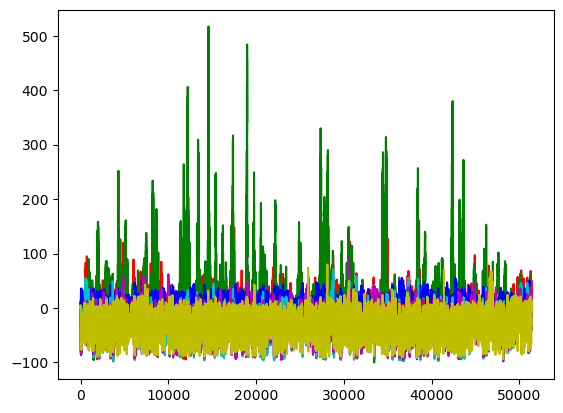

In [172]:
plt.plot(X[:,0], color="r", label="grocery")
plt.plot(X[:,1], color="g", label="park")
plt.plot(X[:,2], color="b", label="residential")
plt.plot(X[:,3], color="c", label="retail")
plt.plot(X[:,4], color="m", label="transit")
plt.plot(X[:,5], color="y", label="workplace")
plt.show()

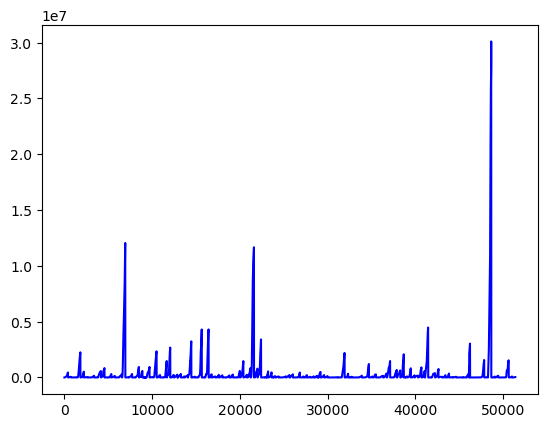

In [173]:
plt.plot(Y, color="b", label='Confirmed_case')
plt.show()

### Scale data with MinMaxScaler for Input and Output Attribute

In [174]:
mms = MinMaxScaler()
X_scaled = mms.fit_transform(X)

### Devide Data to X and Y Variable

In [157]:
X_scaled = scaled[:,0:6]

In [158]:
Y_scaled = scaled[:,6]

### Plot data to see Scaled Data Scatters/Spreading

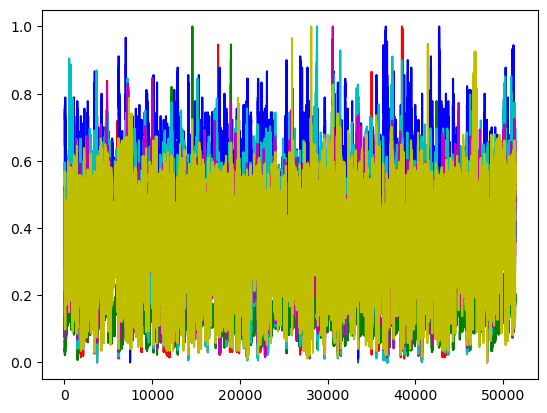

In [175]:
plt.plot(X_scaled[:,0], color="r", label="grocery")
plt.plot(X_scaled[:,1], color="g", label="park")
plt.plot(X_scaled[:,2], color="b", label="residential")
plt.plot(X_scaled[:,3], color="c", label="retail")
plt.plot(X_scaled[:,4], color="m", label="transit")
plt.plot(X_scaled[:,5], color="y", label="workplace")
plt.show()

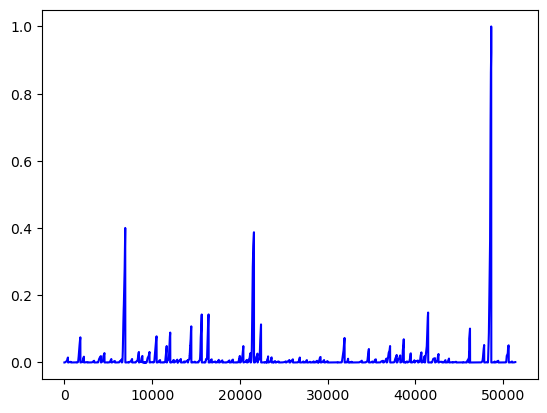

In [183]:
plt.plot(Y_scaled, color="b", label='Confirmed_case')
plt.show()

### Splitting Data to 80% Training Data, 10% Test Data, 10% Validation Data

##### Random State
    Digunakan untuk memastikan supaya setiap kali dilakuakn splitting data, maka pembagian data akan selalu sama dan tidak ada akan menimbulkan variabel test, train, dan validation yang berbeda

In [184]:
X_train, X_vt, Y_train, Y_vt = train_test_split(X_scaled, Y_scaled, test_size=0.2, random_state=42)

In [185]:
X_test, X_val, Y_test, Y_val = train_test_split(X_vt, Y_vt, test_size=0.5, random_state=42)

In [186]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(41100, 6) (5138, 6) (5137, 6) (41100,) (5138,) (5137,)


### Import Required Library

In [187]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

### Model Initialization

In [202]:
model = Sequential([
    Dense(256, activation='relu', input_shape=(6,)),
    Dropout(0.6),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')
])

### Compile Model

In [203]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', 'mse'])

### Start Training and Fitting the Model

In [204]:
hist = model.fit(X_train, Y_train,
          batch_size=128, epochs=100, 
          validation_data=(X_val, Y_val))

Epoch 1/100
322/322 [==============================] - 1s 2ms/step - loss: 0.0694 - accuracy: 0.0554 - mse: 0.0059 - val_loss: 0.0539 - val_accuracy: 0.0574 - val_mse: 0.0020
Epoch 2/100
322/322 [==============================] - 1s 2ms/step - loss: 0.0552 - accuracy: 0.0554 - mse: 0.0023 - val_loss: 0.0536 - val_accuracy: 0.0574 - val_mse: 0.0020
Epoch 3/100
322/322 [==============================] - 1s 2ms/step - loss: 0.0544 - accuracy: 0.0554 - mse: 0.0022 - val_loss: 0.0521 - val_accuracy: 0.0574 - val_mse: 0.0020
Epoch 4/100
322/322 [==============================] - 1s 2ms/step - loss: 0.0542 - accuracy: 0.0554 - mse: 0.0022 - val_loss: 0.0517 - val_accuracy: 0.0574 - val_mse: 0.0019
Epoch 5/100
322/322 [==============================] - 1s 2ms/step - loss: 0.0540 - accuracy: 0.0554 - mse: 0.0022 - val_loss: 0.0517 - val_accuracy: 0.0574 - val_mse: 0.0019
Epoch 6/100
322/322 [==============================] - 1s 2ms/step - loss: 0.0536 - accuracy: 0.0554 - mse: 0.0022 - val_loss

### Evaluate Model to Test Data

In [205]:
model.evaluate(X_test, Y_test)

161/161 [==============================] - 0s 737us/step - loss: 0.0484 - accuracy: 0.0596 - mse: 0.0019


[0.04840095341205597, 0.05956784263253212, 0.0019157534698024392]

### Prediction For X_Test Data

In [206]:
model.predict(X_test)

161/161 [==============================] - 0s 576us/step


array([[0.00117731],
       [0.01152621],
       [0.00049019],
       ...,
       [0.00327704],
       [0.01194099],
       [0.00511085]], dtype=float32)

In [207]:
test = model.predict(X_test)

161/161 [==============================] - 0s 567us/step


### Plot Model to see Model Movement

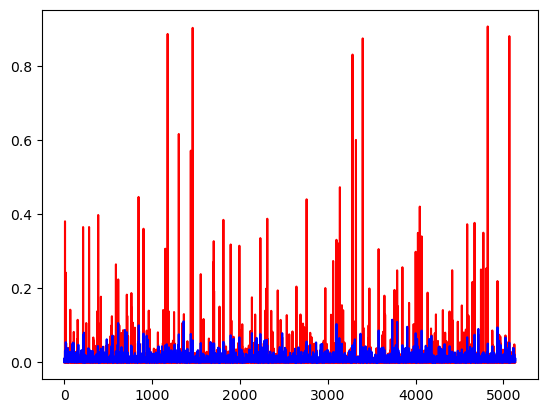

In [208]:
plt.plot(Y_test, color='r', label="RealData")
plt.plot(test, color='b', label='Predicted Test')
plt.show()

### Convert from scaled data to Real Value for Prediction Result and Real Data (X_test, Y_test)

In [209]:
test_value = []
for t in test:
    x = np.min(Y)
    y = np.max(Y) - np.min(Y)
    test_value.append((t * y) + x)
test_value

[array([35441.88], dtype=float32),
 array([346985.7], dtype=float32),
 array([14756.564], dtype=float32),
 array([42438.13], dtype=float32),
 array([64422.39], dtype=float32),
 array([253176.11], dtype=float32),
 array([464421.38], dtype=float32),
 array([957206.56], dtype=float32),
 array([140868.88], dtype=float32),
 array([217769.53], dtype=float32),
 array([245444.08], dtype=float32),
 array([6734.584], dtype=float32),
 array([8582.993], dtype=float32),
 array([50093.06], dtype=float32),
 array([84460.59], dtype=float32),
 array([108754.51], dtype=float32),
 array([1647676.5], dtype=float32),
 array([290559.1], dtype=float32),
 array([558965.25], dtype=float32),
 array([493776.7], dtype=float32),
 array([594378.4], dtype=float32),
 array([258444.36], dtype=float32),
 array([20195.604], dtype=float32),
 array([46231.965], dtype=float32),
 array([523625.8], dtype=float32),
 array([508095.16], dtype=float32),
 array([44896.035], dtype=float32),
 array([100697.81], dtype=float32),
 arr

In [210]:
Y_test_value = []
for t in Y_test:
    x = np.min(Y)
    y = np.max(Y) - np.min(Y)
    Y_test_value.append((t * y) + x)
Y_test_value

[1.9999999999999998,
 1243.0,
 1214.0,
 648.0,
 19.0,
 253908.0,
 395263.0,
 11483370.0,
 3575.0,
 2734454.0,
 4983.0,
 5.0,
 0.0,
 9106.0,
 23684.0,
 150621.0,
 7308801.0,
 96907.0,
 338389.0,
 1094.0,
 1565324.0,
 590844.0,
 523.0,
 712.0,
 205324.0,
 3239.0,
 19.0,
 11887.0,
 14499.0,
 1122.0,
 108775.0,
 10141.0,
 58647.0,
 7714.000000000001,
 291539.0,
 36242.0,
 892813.0,
 0.0,
 14465.0,
 3.0,
 2286.0,
 2434.0,
 113.0,
 27044.0,
 474.99999999999994,
 326258.0,
 154101.0,
 50410.0,
 122996.0,
 86939.0,
 31686.0,
 1192570.0,
 342583.0,
 0.0,
 2075.0,
 449.0,
 268.0,
 1441.0,
 15547.000000000002,
 11357.0,
 67302.0,
 9257.0,
 19573.0,
 30658.0,
 448371.0,
 113655.0,
 7945.999999999999,
 4291271.0,
 917884.0,
 1237504.0,
 18385.0,
 303609.0,
 235444.0,
 508.99999999999994,
 1088.0,
 439841.0,
 690896.0,
 2005.0000000000002,
 1188631.0,
 123383.99999999999,
 24571.0,
 477.99999999999994,
 91047.0,
 905.0,
 939.0,
 27.0,
 7303.0,
 65802.0,
 75234.0,
 34055.0,
 313626.0,
 3750.0,
 13469

In [212]:
Y_test_true = []
test_true = []
for i in range(0, len(Y_test)):
    print(test_value[i], Y_test_value[i])
    if(test[i]==Y_test[i]):
        test_true.append(test_value[i])
        Y_test_true.append(Y_test_value[i])

[35441.88] 1.9999999999999998
[346985.7] 1243.0
[14756.564] 1214.0
[42438.13] 648.0
[64422.39] 19.0
[253176.11] 253908.0
[464421.38] 395263.0
[957206.56] 11483370.0
[140868.88] 3575.0
[217769.53] 2734454.0
[245444.08] 4983.0
[6734.584] 5.0
[8582.993] 0.0
[50093.06] 9106.0
[84460.59] 23684.0
[108754.51] 150621.0
[1647676.5] 7308801.0
[290559.1] 96907.0
[558965.25] 338389.0
[493776.7] 1094.0
[594378.4] 1565324.0
[258444.36] 590844.0
[20195.604] 523.0
[46231.965] 712.0
[523625.8] 205324.0
[508095.16] 3239.0
[44896.035] 19.0
[100697.81] 11887.0
[165461.69] 14499.0
[97965.586] 1122.0
[148659.5] 108775.0
[131850.45] 10141.0
[130098.63] 58647.0
[119488.21] 7714.000000000001
[137855.4] 291539.0
[103500.67] 36242.0
[1171693.2] 892813.0
[8823.351] 0.0
[398287.25] 14465.0
[44859.56] 3.0
[167691.38] 2286.0
[57086.45] 2434.0
[12266.784] 113.0
[121981.6] 27044.0
[116967.49] 474.99999999999994
[113204.35] 326258.0
[363749.22] 154101.0
[181728.89] 50410.0
[58595.297] 122996.0
[205018.08] 86939.0
[1960

### Plot Model based on Real Data

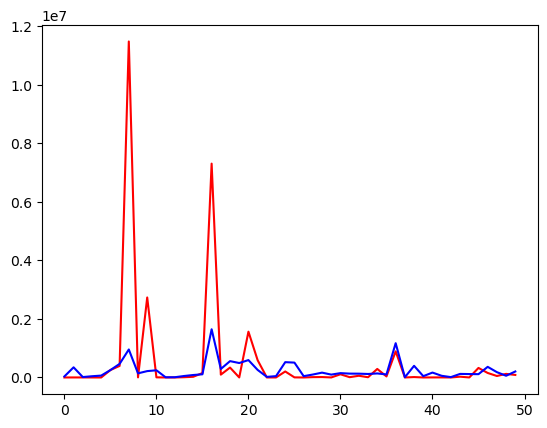

In [215]:
plt.plot(Y_test_value[0:50], color='r', label="RealData")
plt.plot(test_value[0:50], color='b', label='Predicted Test')
plt.show()

### Plot Model Loss

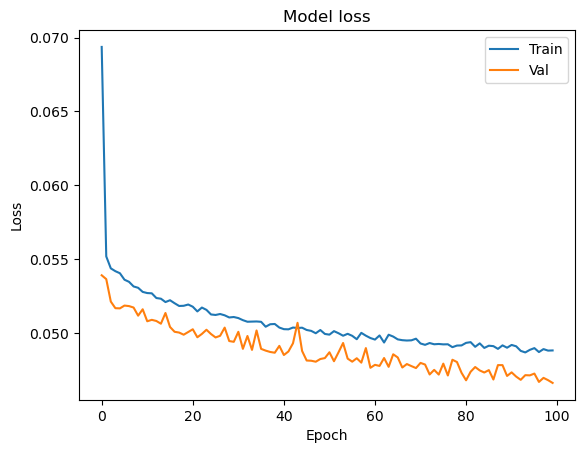

In [216]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

### Plot Model Accuracy

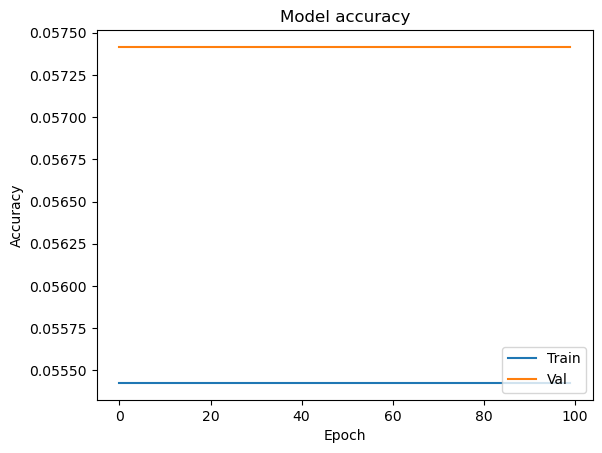

In [217]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

### Train Model with different Input and Hidden Layer

In [141]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(6,)),
    Dropout(0.8),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])

model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=10,
          validation_data=(X_val, Y_val))

Epoch 1/10
1285/1285 [==============================] - 7s 5ms/step - loss: 0.0603 - accuracy: 0.0554 - val_loss: 0.0538 - val_accuracy: 0.0574
Epoch 2/10
1285/1285 [==============================] - 6s 5ms/step - loss: 0.0569 - accuracy: 0.0554 - val_loss: 0.0531 - val_accuracy: 0.0574
Epoch 3/10
1285/1285 [==============================] - 6s 5ms/step - loss: 0.0558 - accuracy: 0.0554 - val_loss: 0.0527 - val_accuracy: 0.0574
Epoch 4/10
1285/1285 [==============================] - 7s 5ms/step - loss: 0.0554 - accuracy: 0.0554 - val_loss: 0.0524 - val_accuracy: 0.0574
Epoch 5/10
1285/1285 [==============================] - 6s 5ms/step - loss: 0.0552 - accuracy: 0.0554 - val_loss: 0.0523 - val_accuracy: 0.0574
Epoch 6/10
1285/1285 [==============================] - 6s 5ms/step - loss: 0.0549 - accuracy: 0.0554 - val_loss: 0.0542 - val_accuracy: 0.0574
Epoch 7/10
1285/1285 [==============================] - 6s 5ms/step - loss: 0.0548 - accuracy: 0.0554 - val_loss: 0.0528 - val_accuracy:

### Plot Model for X Test and Y Test

9/9 [==============================] - 0s 2ms/step


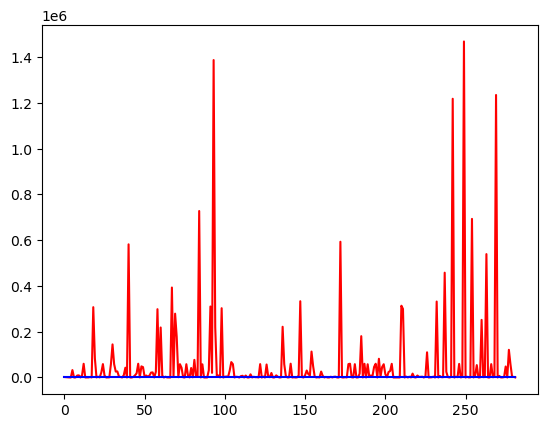

In [60]:
test = model_2.predict(X_test)
plt.plot(Y_test, color='r', label="RealData")
plt.plot(test, color='b', label='Predicted Test')
plt.show()

### Plot Model Loss

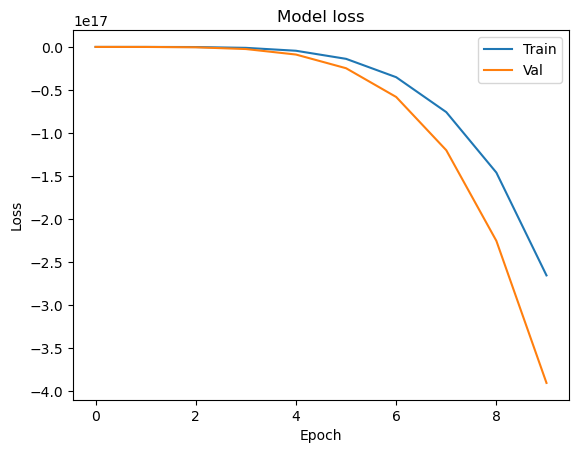

In [61]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

### Plot Model Accuracy

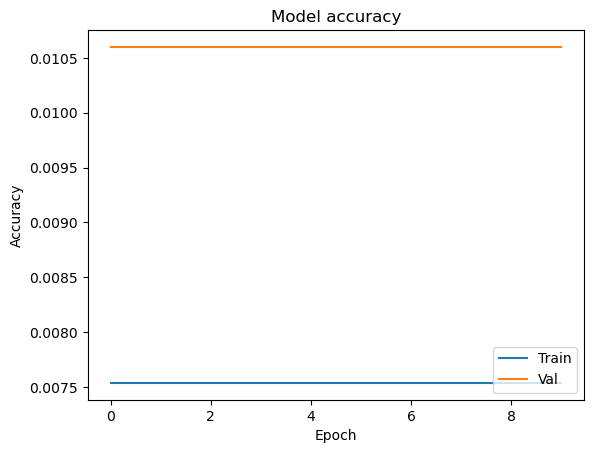

In [62]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [66]:
# Footer
myDate = datetime.datetime.now()
print("I certify that this is my own work.")
print("Signed by:")
print("Kelompok J")
print("Name 1 \t\t: {}".format(name1))
print("NIM 1 \t\t: {}".format(nim1))
print("Name 2 \t\t: {}".format(name2))
print("NIM 2 \t\t: {}".format(nim2))
print("Name 3 \t\t: {}".format(name3))
print("NIM 3 \t\t: {}".format(nim3))
print("Name 4 \t\t: {}".format(name4))
print("NIM 4 \t\t: {}".format(nim4))
print("Time-stamp \t: {}".format(myDate))
print("Device ID \t: {}".format(myDevice))

I certify that this is my own work.
Signed by:
Kelompok J
Name 1 		: Antonius Kevin Budi Saputra
NIM 1 		: 45444
Name 2 		: Chrealvin
NIM 2 		: 45606
Name 3 		: Ela Setiorini
NIM 3 		: 48258
Name 4 		: Muhammad Farrel Prasetyo
NIM 4 		: 51515
Time-stamp 	: 2022-12-07 21:56:16.422250
Device ID 	: 48ade69c-763f-11ed-9973-068db3350b0b


***

### Save the notebook, then convert the notebook to html (by running the next code).

In [67]:
!jupyter nbconvert --to html "./IF540L_ProjectUAS_Kelompok J.ipynb" --output-dir="./"

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] Converting notebook ./IF540L_ProjectUAS_Kelompok J.ipynb to html
/opt/anaconda3/envs/tf/lib/python3.10/site-packages/nbformat/__init__.py:92: DuplicateCellId: Non-unique cell id '44dc37e5' detected. Corrected to 'a0bbb87b'.
  validate(nb)
/opt/anaconda3/envs/tf/lib/python3.10/site-packages/nbformat/__init__.py:92: DuplicateCellId: Non-unique cell id '44dc37e5' detected. Corrected to '236fc8c7'.
  validate(nb)
[NbConvertApp] Writing 1313688 bytes to IF540L_ProjectUAS_Kelompok J.html
